In [1]:
#Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#LOAD AND VIEW DATASET
fifteen_min = pd.read_csv('PTB7_LargeDataSetAll3.csv')
print(fifteen_min.head())

#DEFINE PREDICTOR AND RESPONSE VARIABLES
y = fifteen_min.values[:, 0].astype('uint8')
X = fifteen_min.values[:, 1:]

#FIT LDA MODEL
lda = LDA(n_components=2)
Xlda = lda.fit_transform(X, y)

#DEFINE METHOD TO EVALUATE MODEL
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#EVALUATE MODEL
scores = cross_val_score(lda, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

#Results
percent = (np.mean(scores))*100
print('The mean accuracy is: {}%'.format(percent))
print("---------------------------------------------------")
print('Explained variation per linear discriminant: {}'.format(lda.explained_variance_ratio_))
print("---------------------------------------------------")


   Labels  1000.874  1002.803  1004.731  1006.66  1008.588  1010.517  \
0       1 -0.001280   0.00353   0.01088  0.01998   0.02737   0.03143   
1       1 -0.003390   0.00214   0.01026  0.02010   0.02786   0.03319   
2       1 -0.000419   0.00483   0.01240  0.02203   0.03012   0.03459   
3       2 -0.001400   0.00371   0.01081  0.01928   0.02630   0.03073   
4       2 -0.000675   0.00422   0.01137  0.02057   0.02852   0.03337   

   1012.445  1014.373  1016.302  ...  3384.459  3386.387  3388.316  3390.244  \
0   0.03216   0.02972   0.02574  ...  0.000167  0.000134  0.000205  0.000394   
1   0.03595   0.03603   0.03445  ...  0.000077 -0.000075 -0.000113  0.000229   
2   0.03513   0.03220   0.02720  ...  0.000161  0.000096  0.000097  0.000220   
3   0.03243   0.03154   0.02888  ... -0.000008  0.000062  0.000073  0.000268   
4   0.03454   0.03270   0.02902  ...  0.000079  0.000228  0.000279  0.000516   

   3392.173  3394.101   3396.03  3397.958  3399.887  3401.815  
0  0.000452  0.000405 

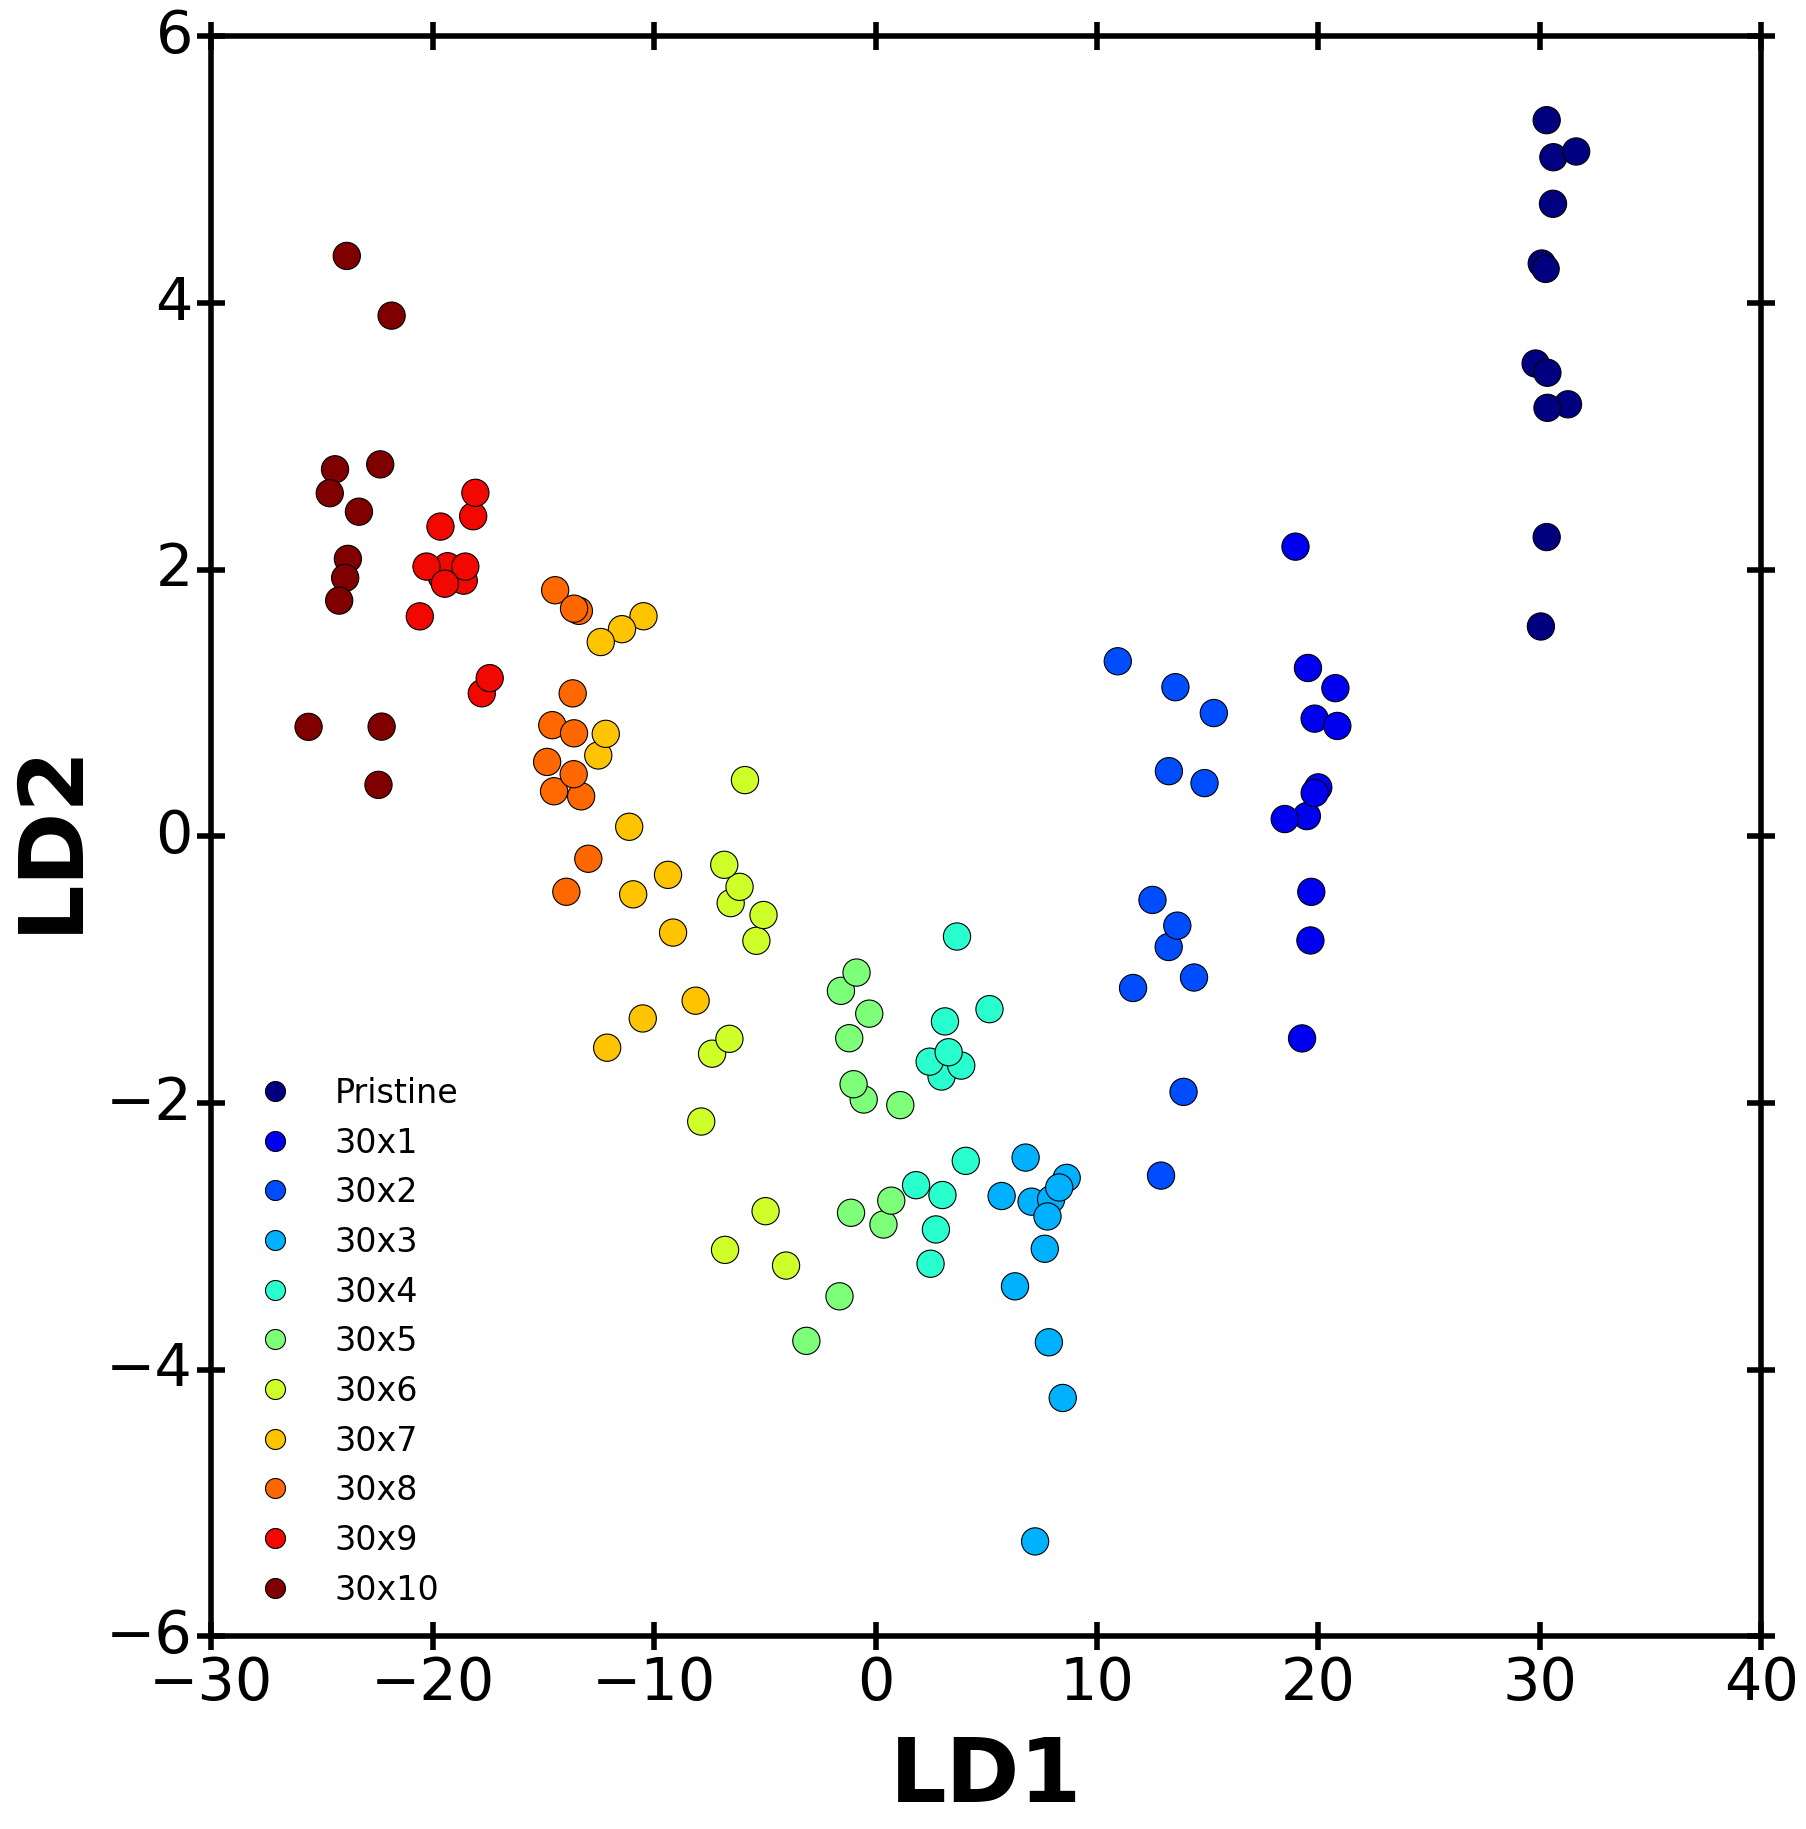

In [3]:
#Plot LDA scores
import matplotlib.pyplot as plt

plt.style.use('classic')

plt.figure(facecolor='white', figsize=(25, 25))
plt.rc('axes', linewidth = 5)

plt.xlabel('LD1', labelpad = 20, fontsize=80, fontweight='semibold')
plt.ylabel('LD2', labelpad = 10, fontsize=80, fontweight='semibold')
plt.xticks(fontsize = 53)
plt.yticks(fontsize = 53)
plt.tick_params(width = 5, length = 25, direction = 'inout')
scatter = plt.scatter(
    Xlda[:,0],
    Xlda[:,1],
    cmap='jet',
    c=y,
    s=600,
    edgecolors='k',
    )


classes = ['Pristine', '30x1', '30x2', '30x3', '30x4', '30x5', '30x6', '30x7', '30x8', '30x9', '30x10']


plt.legend(numpoints=1, handles=scatter.legend_elements()[0], labels=classes, markerscale = 3, frameon = False, fontsize = 30, loc = 'best')


plt.savefig('test_LDA-FilmOnly-1300-1900.png')